In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
# define function to initialize "pretty" plots
def define_figure(xlabel="X",ylabel="Y"):
    # setup plot parameters
    fig = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
    ax.set_xlabel(xlabel,size=20)
    ax.set_ylabel(ylabel,size=20)
    plt.tick_params(axis='both',labelsize=20)
    return ax

# NMR Day 2

Last time we derived the time-dependent expectation value of the transverse magnetic moment of a nucleus in a magnetic field as

$\langle \mu_x \rangle = g\mu_N\cos\omega_0t\sum_{m_I=-I}^{m_I=I-1}\sqrt{(I-m_I)(I+m_I+1)}$,

where $g$ is the nuclear g factor (depends on specific nucleus), $\mu_N = \frac{eh}{4\pi m_p} = 5\times10^{-27} amp\cdot m^2$ is the nuclear magneton, $\omega_0$ is the procession frequency, $I$ is the spin of the nucleus and $m_I$ is the spin projection on the $z$-axis.  

$\omega_0 = \gamma B_0$ is the frequency of oscillation of the transverse component of the magnetic moment of the nucleus.  For a proton, $I=1/2$, $\hbar \gamma = 2\mu_p$ where $\mu_p = g_p\mu_N$ yielding $\gamma = 4.26$ kHz/G.

Note that we we really care about are the selection rules for absorbing a magnetic field along $x$.  It should be fairly obvious that, due to the equation $\mu_x = \hbar \gamma \frac{I_++I_-}{2}$, the selection rule is $\Delta m_I = \pm 1$.

## Basics of NMR Spectra

At $4.26$ kHz/G, a 1.41 T (or 14100 G) magnetic will have a hydrogen resonant frequency at 60 MHz.  Stronger magnets will lead to higher resonant frequencies.  In an NMR apparatus, the absorption of a transverse radio frequency magnetic field is measured.  Because of the relationship between transverse dipole moment frequencies and applied magnetic field, $\omega_0 = \gamma B_0$, it is equivalent to scan the applied field or the radio frequency to determine an absorption spectrum.  It is standard to fix the radio frequency and scan magnetic field strength.  

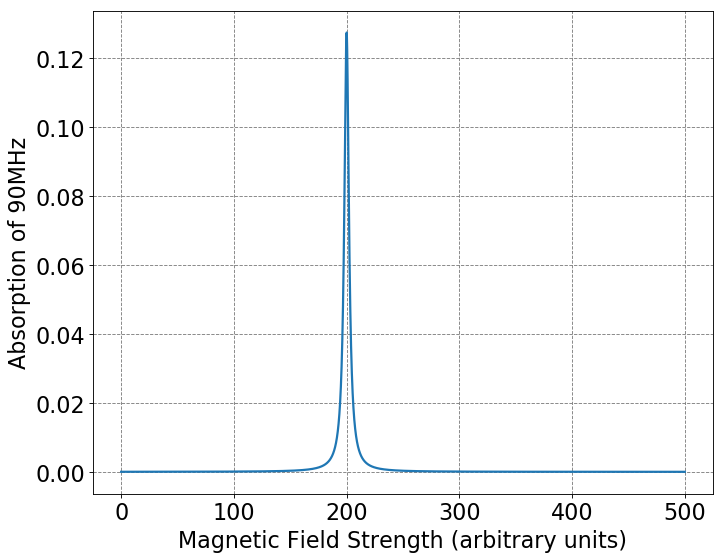

In [6]:
ax = define_figure(xlabel="Magnetic Field Strength (arbitrary units)",ylabel="Absorption of 90MHz")
def lorentzian(x,x0,fwhm):
    return (2*np.pi)**(-1) * fwhm / ( (x-x0)**2 + (0.5*fwhm)**2 )

x = np.arange(0,500,0.01)
fwhm = 5.0
x0 = 200.0

plt.plot(x,lorentzian(x,x0,fwhm),lw=2)

The above plot depicts what the absorption of a sample (with one chemically equivalent absorbing nucleus) might look like as a function of applied magnetic field strength.  This can be converted into aborption as a function of frequency which is the way it is typically plotted.

(500, 0)

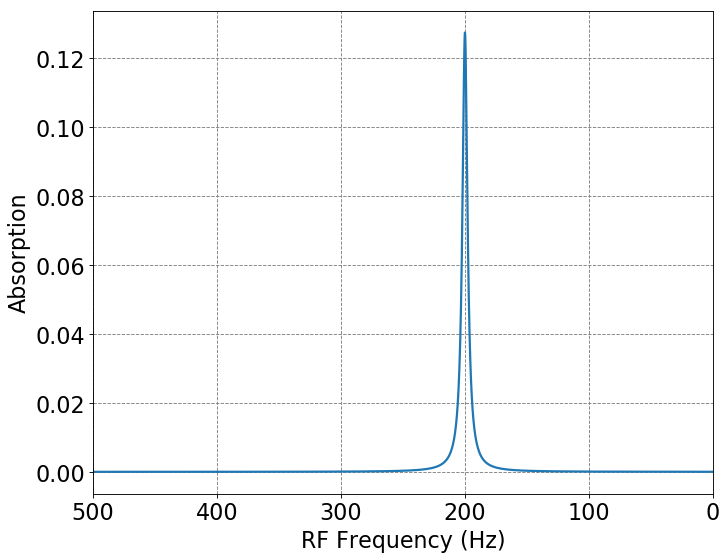

In [7]:
ax = define_figure(xlabel="Frequency (Hz)",ylabel="Absorption")
def lorentzian(x,x0,fwhm):
    return (2*np.pi)**(-1) * fwhm / ( (x-x0)**2 + (0.5*fwhm)**2 )

x = np.arange(0,500,0.01)
fwhm = 5.0
x0 = 200.0

plt.plot(x,lorentzian(x,x0,fwhm),lw=2)
plt.xlim(500,0)

The above plot shows the absorbance of a sample as a function of applied radio frequency.  This is a more typical arrangement of a NMR spectrum.  Though, typically, the independent variable is converted chemical shift, $\delta_H$, which is independent of NMR spectrometer

$\delta_H = \frac{\text{resonance frequency of nucleus relative to TMS}}{\text{spectrometer frequency}}\times 10^6$

$ = \left( \frac{\nu_H - \nu_{TMS}}{\nu_{spectrometer}}\right)\times 10^6$.



# Shielding

So far we have been assuming $B_z$ (or $B_0$), the magnetic field felt by a nucleus, is constant across the sample.  If this were the case, NMR spectra of molecules would not be able to distinguish one hydrogen from another (and thus would be fairly useless).  Really $B_z$ should be the magnetic field felt by a nucleus.  This value will depend on the environment of each nucleus.  

The reason for neighborhood dependent magnetic fields is the motion of the electrons surrounding a nucleus due to the presence of the applied magnetic field.  This yields an electronic response magnetic field, $B_{elec}$ that is proportional to the applied field

$B_{elec} = -\sigma B_0$.  

The negative sign in the above equation denotes the opposing signs of $B_{elec}$ and $B_0$ and $\sigma$ is called the shielding constant (typical values of $\sim 10^{-5}$).  

The total field experienced by a nucleus is thus

$B_z = B_0 + B_{elec} = (1-\sigma)B_0$.

If we plug this into our equation for the transverse component of the spin magnetic moment we get

$\omega_0 = \gamma (1-\sigma)B_0$

or

$B_0 = \frac{\omega_0}{\gamma(1-\sigma)}$

is the magnetic field strength at which a nucleus with shielding constant $\sigma$ will absorb the transverse RF magentic field.  

This leads to a resonant frequency of a hydrogen nucleus of

$\nu_H = \frac{\gamma B_0}{2\pi}(1-\sigma_H)$.

Of course this is usually converted to a chemical shift, $\delta_H$, in the manner discussed above.  It should be noted that the difference in chemical shift between two peaks in an NMR spectrum can be used to estimate the shielding constants for the two nuclei

$\delta_1 - \delta_2 = (\sigma_2 - \sigma_1)\times 10^6$.

***Example: Converting from frequency to chemical shift in an NMR spectrum***

Suppose we take an NMR spectrum of a sample and observe three absorption peaks: one at 490 Hz, one at 210 Hz and one at 5 Hz.  The lowest peak is due to the TMS standard.  The spectrometer is a 60-MHz machine.  Convert the spectrum from a frequency domain to a chemical shift domain

(500, 0)

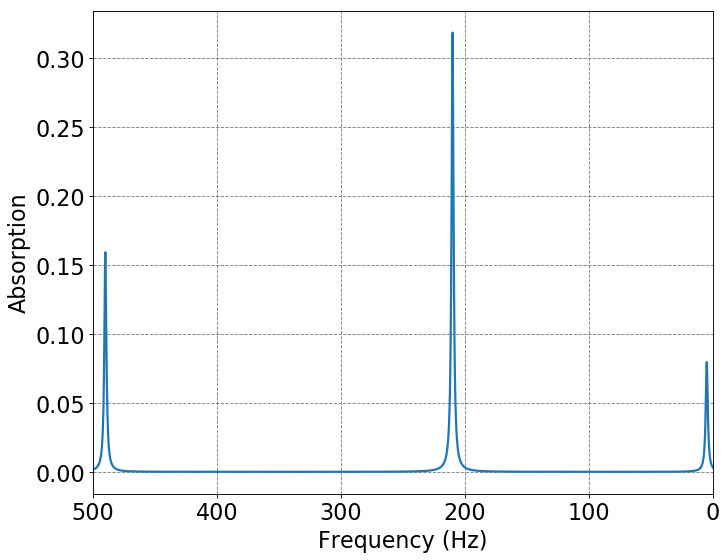

In [9]:
# First we will plot the frequency domain
ax = define_figure(xlabel="Frequency (Hz)",ylabel="Absorption")
def lorentzian(x,x0,fwhm):
    return (2*np.pi)**(-1) * fwhm / ( (x-x0)**2 + (0.5*fwhm)**2 )

x = np.arange(0,500,0.01)
fwhm = 2.0
x0 = 200.0

plt.plot(x,0.25*lorentzian(x,5,fwhm)+lorentzian(x,210,fwhm)+0.5*lorentzian(x,490,fwhm),lw=2)
plt.xlim(500,0)

(10, -0.5)

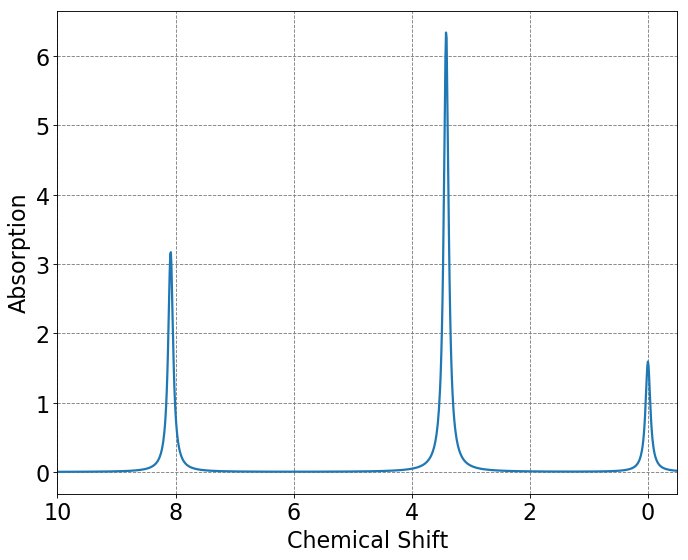

In [13]:
# We now want to convert to ppm chemical shift
ax = define_figure(xlabel="Chemical Shift",ylabel="Absorption")
def lorentzian(x,x0,fwhm):
    return (2*np.pi)**(-1) * fwhm / ( (x-x0)**2 + (0.5*fwhm)**2 )

x = np.arange(-1,10,0.01)
fwhm = 0.1

x0 = (5-5.0)/60.0
x1 = (210-5.0)/60.0
x2 = (490-5.0)/60.0



plt.plot(x,0.25*lorentzian(x,x0,fwhm)+lorentzian(x,x1,fwhm)+0.5*lorentzian(x,x2,fwhm),lw=2)
plt.xlim(10,-0.5)

## Spin-spin coupling

Spin-spin coupling leads to multiplets in an NMR spectrum.